In [7]:
import os
import sys
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from MDAnalysis.analysis.rdf import InterRDF
import MDAnalysis as mda

In [2]:
df = pd.read_csv('water_aimd_1ns_every0.5fs-1.ener', sep='\s+')
df

,StepNr.,Time[fs],Kin.[a.u.],Temp[K],Pot.[a.u.],ConsQty[a.u.],UsedTime[s]
0,0,0.0,0.273613,300.000000,-1102.629449,-1102.355836,0.000000
1,1,0.5,0.279634,306.601635,-1102.634728,-1102.356033,45.464615
2,2,1.0,0.278176,305.003474,-1102.643688,-1102.356285,7.319257
3,3,1.5,0.280393,307.434493,-1102.653081,-1102.356547,7.283930
4,4,2.0,0.282889,310.171274,-1102.655863,-1102.356593,7.267886
...,...,...,...,...,...,...,...
2383,2383,1191.5,0.255069,279.668083,-1102.688861,-1102.355728,14.566674
2384,2384,1192.0,0.258862,283.826131,-1102.688972,-1102.355720,21.317800
2385,2385,1192.5,0.257832,282.697292,-1102.687772,-1102.355663,9.037950
2386,2386,1193.0,0.248086,272.011551,-1102.686630,-1102.355661,8.891133


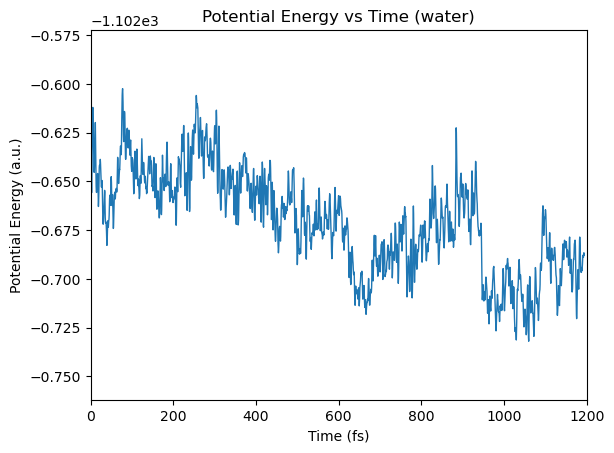

In [10]:
plt.figure()
plt.plot(df['Time[fs]'], df['Pot.[a.u.]'], linewidth=1)
plt.xlim(0, 1200)
plt.ylim(df['Pot.[a.u.]'].min()-0.03, df['Pot.[a.u.]'].max()+0.03)
plt.xlabel('Time (fs)')
plt.ylabel('Potential Energy (a.u.)')
plt.title('Potential Energy vs Time (water)')
plt.savefig('Pot_Ene_vs_time_water.pdf')
plt.show()

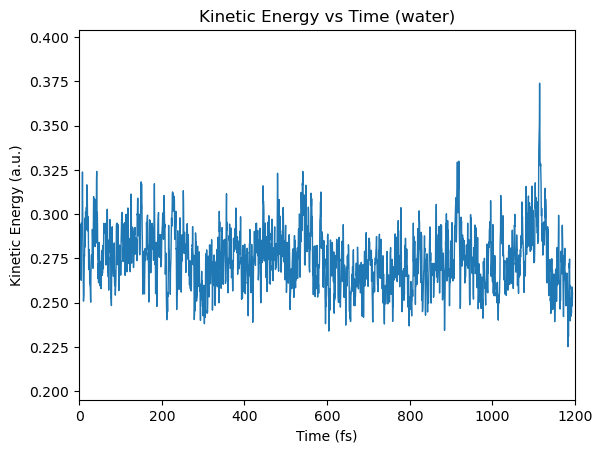

In [11]:
plt.figure()
plt.plot(df['Time[fs]'], df['Kin.[a.u.]'], linewidth=1)
plt.xlim(0, 1200)
plt.ylim(df['Kin.[a.u.]'].min()-0.03, df['Kin.[a.u.]'].max()+0.03)
plt.xlabel('Time (fs)')
plt.ylabel('Kinetic Energy (a.u.)')
plt.title('Kinetic Energy vs Time (water)')
plt.savefig('Kin_Ene_vs_time_water.pdf')
plt.show()

In [15]:
df_proton = pd.read_csv('proton_aimd_1ns_every0.5fs-1.ener', sep='\s+')
df_proton

,StepNr.,Time[fs],Kin.[a.u.],Temp[K],Pot.[a.u.],ConsQty[a.u.],UsedTime[s]
0,0,0.0,0.275038,300.000000,-1103.008802,-1102.733764,0.000000
1,1,0.5,0.277645,302.843933,-1103.012285,-1102.733829,140.686402
2,2,1.0,0.270523,295.075139,-1103.021525,-1102.734083,315.783001
3,3,1.5,0.282133,307.738802,-1103.036346,-1102.734491,36.888236
4,4,2.0,0.281935,307.523364,-1103.046899,-1102.734690,33.116974
...,...,...,...,...,...,...,...
2084,2084,1042.0,0.293596,320.242812,-1103.268942,-1102.735411,7.231689
2085,2085,1042.5,0.285285,311.177294,-1103.267500,-1102.735386,10.040131
2086,2086,1043.0,0.283341,309.056245,-1103.265099,-1102.735387,7.235320
2087,2087,1043.5,0.269628,294.098857,-1103.259206,-1102.735276,7.217309


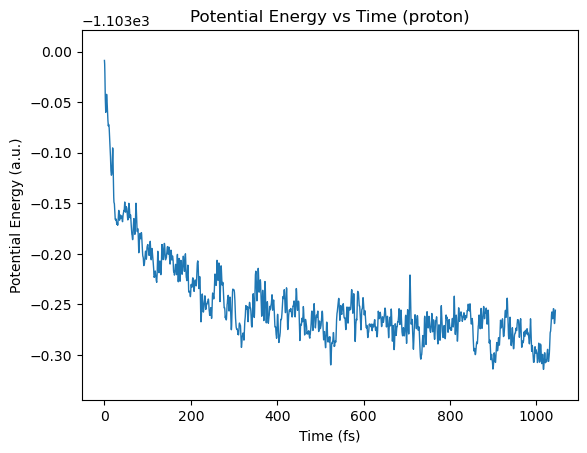

In [19]:
plt.figure()
plt.plot(df_proton['Time[fs]'], df_proton['Pot.[a.u.]'], linewidth=1)
plt.ylim(df_proton['Pot.[a.u.]'].min()-0.03, df_proton['Pot.[a.u.]'].max()+0.03)
plt.xlabel('Time (fs)')
plt.ylabel('Potential Energy (a.u.)')
plt.title('Potential Energy vs Time (proton)')
plt.savefig('Pot_Ene_vs_time_proton.pdf')
plt.show()

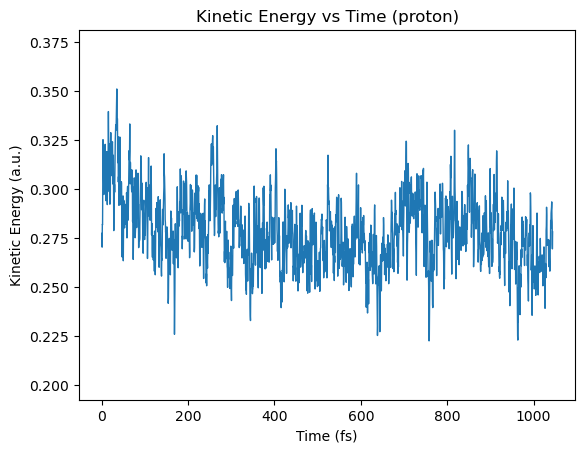

In [20]:
plt.figure()
plt.plot(df_proton['Time[fs]'], df_proton['Kin.[a.u.]'], linewidth=1)
plt.ylim(df_proton['Kin.[a.u.]'].min()-0.03, df_proton['Kin.[a.u.]'].max()+0.03)
plt.xlabel('Time (fs)')
plt.ylabel('Kinetic Energy (a.u.)')
plt.title('Kinetic Energy vs Time (proton)')
plt.savefig('Kin_Ene_vs_time_proton.pdf')
plt.show()

#### Compute g(r)

In [5]:
water_traj = 'water_aimd_1ns_every0.5fs-pos-1.xyz'
traj_1 = mda.Universe(water_traj)

# set dimensions of the box
traj_1.dimensions = np.array([12.42, 12.42, 12.42, 90, 90, 90])

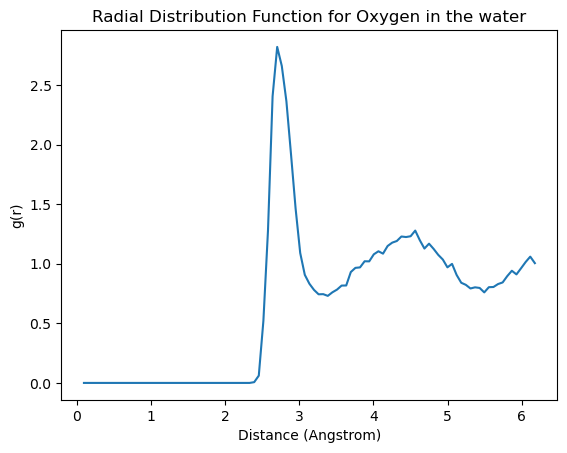

In [9]:
box_size = 12.42
rdf = InterRDF(traj_1.select_atoms('name O'), traj_1.select_atoms('name O'), range=(0.0, box_size / 2), nbins=100)
rdf.run()

# plot the radial distribution function for Oxygen
plt.plot(rdf.bins[1:], rdf.rdf[1:])
# the first one shouldn't be included because it's the RDF of the atom with itself
plt.xlabel('Distance (Angstrom)')
plt.ylabel('g(r)')
plt.title('Radial Distribution Function for Oxygen in the water')
plt.savefig('water_O_O_rdf.pdf', bbox_inches='tight')
plt.show()

In [21]:
proton_traj = 'proton_aimd_1ns_every0.5fs-pos-1.xyz'
traj_2 = mda.Universe(proton_traj)

# set dimensions of the box
traj_2.dimensions = np.array([12.42, 12.42, 12.42, 90, 90, 90])

/ext3/miniconda3/lib/python3.9/site-packages/MDAnalysis/analysis/base.py:438: UserWarning: Reader has no dt information, set to 1.0 ps
  self.times[i] = ts.time
/ext3/miniconda3/lib/python3.9/site-packages/MDAnalysis/analysis/rdf.py:316: DeprecationWarning: The `bins` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.bins` instead
  warnings.warn(wmsg, DeprecationWarning)
/ext3/miniconda3/lib/python3.9/site-packages/MDAnalysis/analysis/rdf.py:324: DeprecationWarning: The `rdf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rdf` instead
  warnings.warn(wmsg, DeprecationWarning)


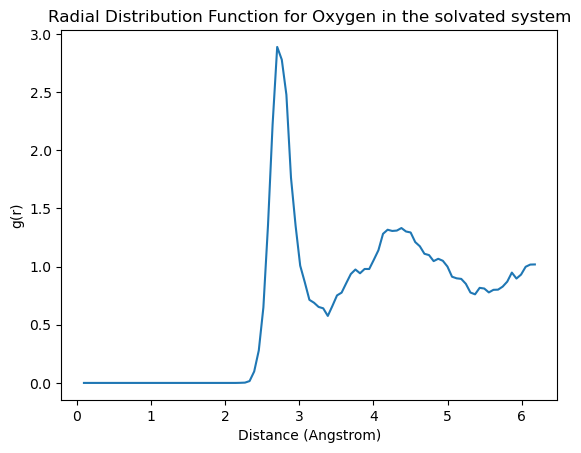

In [22]:
box_size = 12.42
rdf = InterRDF(traj_2.select_atoms('name O'), traj_2.select_atoms('name O'), range=(0.0, box_size / 2), nbins=100)
rdf.run()

# plot the radial distribution function for Oxygen
plt.plot(rdf.bins[1:], rdf.rdf[1:])
# the first one shouldn't be included because it's the RDF of the atom with itself
plt.xlabel('Distance (Angstrom)')
plt.ylabel('g(r)')
plt.title('Radial Distribution Function for Oxygen in the solvated system')
plt.savefig('proton_O_O_rdf.pdf', bbox_inches='tight')
plt.show()